In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


# Simulation Study: Comparing various filtering techniques on diffusion and stochastic time processes

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from filtering.utils import simulate as sim
from filtering.filtering import kf
from filtering.filtering import particle_filter as pf

## Simulate Heston process

In [3]:
S0 = 100
r = 0.2
q = 0
N = 1000
dt = 1/250

In [4]:
true_params = [r, 2.2, 0.15, 0.3, -0.6, 0.02]
init_params = [0.45, 1.1, 0.05, 0.35, -0.4, 0.05]

In [5]:
y = sim.simulate_heston_state(true_params, S0, N=N, dt=dt)
obs = np.array(y[0,:])[0]

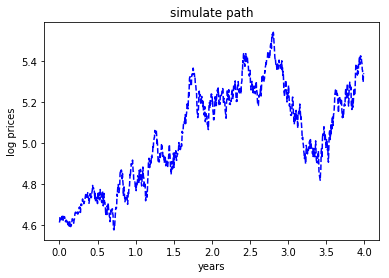

In [6]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.ylabel('log prices')
plt.show()

# neg vol: [[0]]


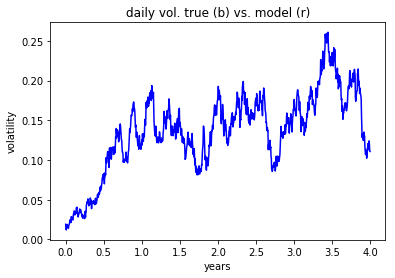

In [7]:
print("# neg vol:", sum(y[1,:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.ylabel('volatility')
plt.show()

# Filtering

In [11]:
reload(kf)

<module 'filtering.filtering.kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/kf.py'>

In [12]:
ekf = kf.EKFHeston(obs, dt=dt, is_log=True)
ukf = kf.UKFHeston(obs, dt=dt, is_log=True)

num_particles = 2000
pf_heston = pf.PFHeston(obs, dt=dt, N=num_particles, is_log=True)

In [13]:
print("True Params: {}".format(true_params))
print("Init Params: {}".format(init_params))

True Params: [0.2, 2.2, 0.15, 0.3, -0.6, 0.02]
Init Params: [0.45, 1.1, 0.05, 0.35, -0.4, 0.05]


In [37]:
maxiter = 2500

In [38]:
ekf_opt = ekf.optimize(init_params, maxiter=maxiter)

i: 1
x_i: [ 0.45    1.1     0.05    0.35   -0.4     0.0525]
f_i: -6.236489008852859
i: 2
x_i: [ 0.45    1.1     0.05    0.35   -0.4     0.0525]
f_i: -6.236489008852859
i: 3
x_i: [ 0.45    1.1     0.05    0.35   -0.4     0.0525]
f_i: -6.236489008852859
i: 4
x_i: [ 0.45    1.1     0.05    0.35   -0.4     0.0525]
f_i: -6.236489008852859
i: 5
x_i: [ 0.42333333  1.04941358  0.05395062  0.3504321  -0.39012346  0.05395062]
f_i: -6.2693202386220355
i: 6
x_i: [ 0.42333333  1.04941358  0.05395062  0.3504321  -0.39012346  0.05395062]
f_i: -6.2693202386220355
i: 7
x_i: [ 0.45291667  1.09966049  0.05290123  0.33628086 -0.36358025  0.0558179 ]
f_i: -6.307275097498542
i: 8
x_i: [ 0.45291667  1.09966049  0.05290123  0.33628086 -0.36358025  0.0558179 ]
f_i: -6.307275097498542
i: 9
x_i: [ 0.42958333  1.03820988  0.05302469  0.36145062 -0.37493827  0.05885802]
f_i: -6.362424106321517
i: 10
x_i: [ 0.42958333  1.03820988  0.05302469  0.36145062 -0.37493827  0.05885802]
f_i: -6.362424106321517
i: 11
x_i: [ 

f_i: -6.66078565085979
i: 78
x_i: [ 0.35844705  0.51450006  0.0741656   0.30576769 -0.14384708  0.11668579]
f_i: -6.66078565085979
i: 79
x_i: [ 0.35844705  0.51450006  0.0741656   0.30576769 -0.14384708  0.11668579]
f_i: -6.66078565085979
i: 80
x_i: [ 0.35697438  0.51372314  0.07443118  0.3066128  -0.14303227  0.11676052]
f_i: -6.660785797791753
i: 81
x_i: [ 0.35697438  0.51372314  0.07443118  0.3066128  -0.14303227  0.11676052]
f_i: -6.660785797791753
i: 82
x_i: [ 0.35731884  0.5140295   0.07429271  0.30572736 -0.14352438  0.11674359]
f_i: -6.660785852982136
i: 83
x_i: [ 0.35731884  0.5140295   0.07429271  0.30572736 -0.14352438  0.11674359]
f_i: -6.660785852982136
i: 84
x_i: [ 0.35799192  0.51540032  0.07428569  0.30568018 -0.14302996  0.1167554 ]
f_i: -6.660785853254978
i: 85
x_i: [ 0.35799192  0.51540032  0.07428569  0.30568018 -0.14302996  0.1167554 ]
f_i: -6.660785853254978
i: 86
x_i: [ 0.35799192  0.51540032  0.07428569  0.30568018 -0.14302996  0.1167554 ]
f_i: -6.66078585325497

i: 154
x_i: [0.44771991 1.86360826 0.20450445 0.41381711 0.63933822 0.11701164]
f_i: -6.661018767023874
i: 155
x_i: [0.44771991 1.86360826 0.20450445 0.41381711 0.63933822 0.11701164]
f_i: -6.661018767023874
i: 156
x_i: [0.44771991 1.86360826 0.20450445 0.41381711 0.63933822 0.11701164]
f_i: -6.661018767023874
i: 157
x_i: [0.44771991 1.86360826 0.20450445 0.41381711 0.63933822 0.11701164]
f_i: -6.661018767023874
i: 158
x_i: [0.44771991 1.86360826 0.20450445 0.41381711 0.63933822 0.11701164]
f_i: -6.661018767023874
i: 159
x_i: [0.44015375 1.81726256 0.20084984 0.41284792 0.61366049 0.11692948]
f_i: -6.661039351087057
i: 160
x_i: [0.44015375 1.81726256 0.20084984 0.41284792 0.61366049 0.11692948]
f_i: -6.661039351087057
i: 161
x_i: [0.44015375 1.81726256 0.20084984 0.41284792 0.61366049 0.11692948]
f_i: -6.661039351087057
i: 162
x_i: [0.44015375 1.81726256 0.20084984 0.41284792 0.61366049 0.11692948]
f_i: -6.661039351087057
i: 163
x_i: [0.44015375 1.81726256 0.20084984 0.41284792 0.61366

i: 233
x_i: [0.3885391  1.9293212  0.23357206 0.48390762 0.7438656  0.11680589]
f_i: -6.661148287402202
i: 234
x_i: [0.3885391  1.9293212  0.23357206 0.48390762 0.7438656  0.11680589]
f_i: -6.661148287402202
i: 235
x_i: [0.3885391  1.9293212  0.23357206 0.48390762 0.7438656  0.11680589]
f_i: -6.661148287402202
i: 236
x_i: [0.3885391  1.9293212  0.23357206 0.48390762 0.7438656  0.11680589]
f_i: -6.661148287402202
i: 237
x_i: [0.38927187 1.93068234 0.23334138 0.48304155 0.74338991 0.11679545]
f_i: -6.661148288139201
i: 238
x_i: [0.38926526 1.92994015 0.23334608 0.48315062 0.74332096 0.11680442]
f_i: -6.661148315306242
i: 239
x_i: [0.38926526 1.92994015 0.23334608 0.48315062 0.74332096 0.11680442]
f_i: -6.661148315306242
i: 240
x_i: [0.39043464 1.93358593 0.23334338 0.48243925 0.74435898 0.11680523]
f_i: -6.661148414225417
i: 241
x_i: [0.39043464 1.93358593 0.23334338 0.48243925 0.74435898 0.11680523]
f_i: -6.661148414225417
i: 242
x_i: [0.38952721 1.93278805 0.23346156 0.48300272 0.74430

i: 312
x_i: [0.39205687 1.91471688 0.23287354 0.48532755 0.74161566 0.11678211]
f_i: -6.661152060596185
i: 313
x_i: [0.39205687 1.91471688 0.23287354 0.48532755 0.74161566 0.11678211]
f_i: -6.661152060596185
i: 314
x_i: [0.3957773  1.91351106 0.23239634 0.48464793 0.74170654 0.11674255]
f_i: -6.661152849107169
i: 315
x_i: [0.39642437 1.90352846 0.23219016 0.48612309 0.74026708 0.11675737]
f_i: -6.6611542110091895
i: 316
x_i: [0.39642437 1.90352846 0.23219016 0.48612309 0.74026708 0.11675737]
f_i: -6.6611542110091895
i: 317
x_i: [0.39742871 1.89258414 0.23188965 0.48764946 0.7385622  0.11675603]
f_i: -6.661155833972757
i: 318
x_i: [0.39742871 1.89258414 0.23188965 0.48764946 0.7385622  0.11675603]
f_i: -6.661155833972757
i: 319
x_i: [0.39929451 1.87976512 0.23146663 0.48951438 0.73675148 0.11671273]
f_i: -6.661157666863023
i: 320
x_i: [0.39929451 1.87976512 0.23146663 0.48951438 0.73675148 0.11671273]
f_i: -6.661157666863023
i: 321
x_i: [0.40266818 1.85570015 0.23071897 0.49263344 0.733

i: 391
x_i: [0.40246364 0.99431101 0.21769802 0.63817058 0.59864747 0.11672163]
f_i: -6.661267759944129
i: 392
x_i: [0.40140699 0.99398588 0.21768535 0.63920365 0.59825608 0.11654274]
f_i: -6.661268154582383
i: 393
x_i: [0.40140699 0.99398588 0.21768535 0.63920365 0.59825608 0.11654274]
f_i: -6.661268154582383
i: 394
x_i: [0.39804582 1.00279678 0.21824259 0.6385165  0.59941748 0.11658147]
f_i: -6.661269562640801
i: 395
x_i: [0.39804582 1.00279678 0.21824259 0.6385165  0.59941748 0.11658147]
f_i: -6.661269562640801
i: 396
x_i: [0.39804582 1.00279678 0.21824259 0.6385165  0.59941748 0.11658147]
f_i: -6.661269562640801
i: 397
x_i: [0.39804582 1.00279678 0.21824259 0.6385165  0.59941748 0.11658147]
f_i: -6.661269562640801
i: 398
x_i: [0.39804582 1.00279678 0.21824259 0.6385165  0.59941748 0.11658147]
f_i: -6.661269562640801
i: 399
x_i: [0.39804582 1.00279678 0.21824259 0.6385165  0.59941748 0.11658147]
f_i: -6.661269562640801
i: 400
x_i: [0.39804582 1.00279678 0.21824259 0.6385165  0.59941

i: 470
x_i: [0.39936099 0.99861135 0.22103151 0.64562494 0.612431   0.11680437]
f_i: -6.66128543498905
i: 471
x_i: [0.39566845 0.9987962  0.22264522 0.64897854 0.61736294 0.11694453]
f_i: -6.661289636457233
i: 472
x_i: [0.39697848 0.99643472 0.22374112 0.65212829 0.62297655 0.11700082]
f_i: -6.661295579324031
i: 473
x_i: [0.39697848 0.99643472 0.22374112 0.65212829 0.62297655 0.11700082]
f_i: -6.661295579324031
i: 474
x_i: [0.39642833 0.99713665 0.22553179 0.65629992 0.63087364 0.11708065]
f_i: -6.661303266976474
i: 475
x_i: [0.39642833 0.99713665 0.22553179 0.65629992 0.63087364 0.11708065]
f_i: -6.661303266976474
i: 476
x_i: [0.39388347 0.99626605 0.22596754 0.65788539 0.63134049 0.11702556]
f_i: -6.661305515529419
i: 477
x_i: [0.39388347 0.99626605 0.22596754 0.65788539 0.63134049 0.11702556]
f_i: -6.661305515529419
i: 478
x_i: [0.39388347 0.99626605 0.22596754 0.65788539 0.63134049 0.11702556]
f_i: -6.661305515529419
i: 479
x_i: [0.39388347 0.99626605 0.22596754 0.65788539 0.631340

i: 549
x_i: [0.39141705 0.99961407 0.22598094 0.65958299 0.63099492 0.11660038]
f_i: -6.661312338294391
i: 550
x_i: [0.39114994 1.00010209 0.22601977 0.65959228 0.63105564 0.1165975 ]
f_i: -6.661312371624742
i: 551
x_i: [0.39114994 1.00010209 0.22601977 0.65959228 0.63105564 0.1165975 ]
f_i: -6.661312371624742
i: 552
x_i: [0.39114994 1.00010209 0.22601977 0.65959228 0.63105564 0.1165975 ]
f_i: -6.661312371624742
i: 553
x_i: [0.39114994 1.00010209 0.22601977 0.65959228 0.63105564 0.1165975 ]
f_i: -6.661312371624742
i: 554
x_i: [0.39114994 1.00010209 0.22601977 0.65959228 0.63105564 0.1165975 ]
f_i: -6.661312371624742
i: 555
x_i: [0.39114994 1.00010209 0.22601977 0.65959228 0.63105564 0.1165975 ]
f_i: -6.661312371624742
i: 556
x_i: [0.39114994 1.00010209 0.22601977 0.65959228 0.63105564 0.1165975 ]
f_i: -6.661312371624742
i: 557
x_i: [0.39147096 0.99991901 0.22599774 0.65935783 0.63106065 0.11663648]
f_i: -6.661312390262386
i: 558
x_i: [0.39108112 1.00008051 0.22603349 0.65949639 0.63102

In [39]:
print("True Params: {}".format(true_params))
print("EKF Opt Params: {}".format(ekf_opt))

True Params: [0.2, 2.2, 0.15, 0.3, -0.6, 0.02]
EKF Opt Params: [0.3917479  0.9999996  0.22591744 0.65924623 0.63090622 0.11661721]


In [40]:
ekf_obs, ekf_vol = ekf.filter(obs, ekf_opt)

params: [0.3917479003797387, 1.0000004010174033, 0.17408256072344924, 0.6592462330892948, 0.6309062221728226, 0.11661721320787093]


ekf. filtering prices


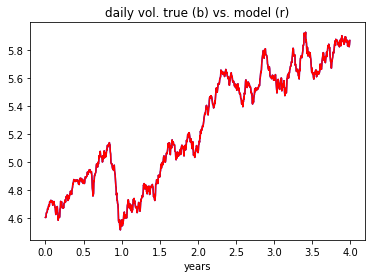

In [41]:
print('ekf. filtering prices')
plt.plot(years[:], np.array(y[0,1:])[0], 'b-')
plt.plot(years[:], ekf_obs, 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

ekf. filtered vol
# neg vol: [[0]]


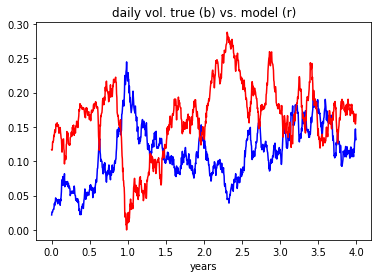

In [42]:
print('ekf. filtered vol')
print("# neg vol:", sum(y[1,:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.plot(years[:], ekf_vol, 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

In [43]:
ukf_opt = ukf.optimize(init_params, maxiter=maxiter)

[0.45, 1.1, 0.05, 0.35, -0.4, 0.05]
[ 0.45  1.1   0.05  0.35 -0.4   0.05]
[ 0.4725  1.1     0.05    0.35   -0.4     0.05  ]
[ 0.45   1.155  0.05   0.35  -0.4    0.05 ]
[ 0.45    1.1     0.0525  0.35   -0.4     0.05  ]
[ 0.45    1.1     0.05    0.3675 -0.4     0.05  ]
[ 0.45  1.1   0.05  0.35 -0.42  0.05]
[ 0.45    1.1     0.05    0.35   -0.4     0.0525]
[ 0.4575      1.11833333  0.05083333  0.3325     -0.40666667  0.05083333]
[ 0.46125  1.1275   0.05125  0.315   -0.41     0.05125]
i: 1
x_i: [ 0.46125  1.1275   0.05125  0.315   -0.41     0.05125]
[ 0.46125  1.1275   0.05125  0.315   -0.41     0.05125]
f_i: -6.3129429002646775
[ 0.46125     1.1275      0.05125     0.33833333 -0.38333333  0.05125   ]
i: 2
x_i: [ 0.46125  1.1275   0.05125  0.315   -0.41     0.05125]
[ 0.46125  1.1275   0.05125  0.315   -0.41     0.05125]
f_i: -6.3129429002646775
[ 0.465       1.06333333  0.05166667  0.33444444 -0.39777778  0.05166667]
i: 3
x_i: [ 0.46125  1.1275   0.05125  0.315   -0.41     0.05125]
[ 0.46

f_i: -6.687230190824773
[ 0.69562773  1.18492838  0.09054685 -0.09556425 -0.32054086  0.07859847]
[ 0.86405179  1.29261737  0.10961714 -0.29368237 -0.27930616  0.08756145]
i: 30
x_i: [ 0.79892768  1.32787413  0.09824391 -0.21812208 -0.31354907  0.08125536]
[ 0.79892768  1.32787413  0.09824391 -0.21812208 -0.31354907  0.08125536]
f_i: -6.687230190824773
[ 0.72940565  1.25943229  0.08944085 -0.07599674 -0.3369494   0.07301449]
[ 0.84296968  1.26260434  0.10877087 -0.28741484 -0.27675565  0.08874626]
i: 31
x_i: [ 0.79892768  1.32787413  0.09824391 -0.21812208 -0.31354907  0.08125536]
[ 0.79892768  1.32787413  0.09824391 -0.21812208 -0.31354907  0.08125536]
f_i: -6.687230190824773
[ 0.87482479  1.369873    0.11595632 -0.39035966 -0.2757036   0.09103222]
[ 0.79042845  1.22789336  0.09927665 -0.17596279 -0.29965707  0.08213248]
i: 32
x_i: [ 0.79892768  1.32787413  0.09824391 -0.21812208 -0.31354907  0.08125536]
[ 0.79892768  1.32787413  0.09824391 -0.21812208 -0.31354907  0.08125536]
f_i: -6

f_i: -6.701118375779791
[ 0.77241591  1.63863089  0.09285377 -0.3114573  -0.38187504  0.0752199 ]
i: 58
x_i: [ 0.78320936  1.77442494  0.09292573 -0.3677935  -0.41458274  0.07273039]
[ 0.78320936  1.77442494  0.09292573 -0.3677935  -0.41458274  0.07273039]
f_i: -6.701118375779791
[ 0.75353902  1.59046811  0.09189579 -0.26706199 -0.370773    0.07459901]
i: 59
x_i: [ 0.78320936  1.77442494  0.09292573 -0.3677935  -0.41458274  0.07273039]
[ 0.78320936  1.77442494  0.09292573 -0.3677935  -0.41458274  0.07273039]
f_i: -6.701118375779791
[ 0.77970575  1.84338673  0.08626421 -0.33877799 -0.42269088  0.07081795]
[ 0.77358372  2.04973149  0.07867549 -0.36185345 -0.46747298  0.06575352]
i: 60
x_i: [ 0.77358372  2.04973149  0.07867549 -0.36185345 -0.46747298  0.06575352]
[ 0.77358372  2.04973149  0.07867549 -0.36185345 -0.46747298  0.06575352]
f_i: -6.7020085554125925
[ 0.78206956  1.94977873  0.08761692 -0.39431073 -0.43368983  0.06998114]
[ 0.78031162  2.17183721  0.08405758 -0.45732403 -0.4713

i: 85
x_i: [ 0.75275073  2.06496599  0.0856489  -0.43488373 -0.48128879  0.06517229]
[ 0.75275073  2.06496599  0.0856489  -0.43488373 -0.48128879  0.06517229]
f_i: -6.70732206110123
[ 0.75346331  2.17383064  0.08280584 -0.4546259  -0.50172111  0.06289668]
i: 86
x_i: [ 0.75275073  2.06496599  0.0856489  -0.43488373 -0.48128879  0.06517229]
[ 0.75275073  2.06496599  0.0856489  -0.43488373 -0.48128879  0.06517229]
f_i: -6.70732206110123
[ 0.75412772  2.07188869  0.08415787 -0.42421774 -0.48604056  0.06456756]
i: 87
x_i: [ 0.75275073  2.06496599  0.0856489  -0.43488373 -0.48128879  0.06517229]
[ 0.75275073  2.06496599  0.0856489  -0.43488373 -0.48128879  0.06517229]
f_i: -6.70732206110123
[ 0.75041675  2.06433239  0.08571989 -0.43257435 -0.48116686  0.06503304]
[ 0.74353052  2.00609244  0.08772688 -0.42515639 -0.47350624  0.06585286]
i: 88
x_i: [ 0.75041675  2.06433239  0.08571989 -0.43257435 -0.48116686  0.06503304]
[ 0.75041675  2.06433239  0.08571989 -0.43257435 -0.48116686  0.06503304]

f_i: -6.709972110285809
[ 0.57260203  1.51770427  0.10163565 -0.37224313 -0.50720918  0.06385142]
[ 0.58590103  1.65253029  0.09939787 -0.40791454 -0.52239689  0.06261856]
i: 114
x_i: [ 0.56783881  1.56820431  0.10241852 -0.403937   -0.51877239  0.06333561]
[ 0.56783881  1.56820431  0.10241852 -0.403937   -0.51877239  0.06333561]
f_i: -6.709972110285809
[ 0.53775163  1.49233775  0.1043094  -0.39276344 -0.52827857  0.06271549]
i: 115
x_i: [ 0.56783881  1.56820431  0.10241852 -0.403937   -0.51877239  0.06333561]
[ 0.56783881  1.56820431  0.10241852 -0.403937   -0.51877239  0.06333561]
f_i: -6.709972110285809
[ 0.52991342  1.44591018  0.1062587  -0.38982348 -0.52149185  0.06291603]
i: 116
x_i: [ 0.56783881  1.56820431  0.10241852 -0.403937   -0.51877239  0.06333561]
[ 0.56783881  1.56820431  0.10241852 -0.403937   -0.51877239  0.06333561]
f_i: -6.709972110285809
[ 0.59702825  1.66855681  0.09914899 -0.4163727  -0.5253066   0.06283596]
i: 117
x_i: [ 0.56783881  1.56820431  0.10241852 -0.40

f_i: -6.710196291985572
[ 0.5530734   1.49568739  0.10356674 -0.38465367 -0.52621434  0.06222223]
i: 141
x_i: [ 0.57495502  1.55982284  0.10158673 -0.39153752 -0.52368962  0.0622607 ]
[ 0.57495502  1.55982284  0.10158673 -0.39153752 -0.52368962  0.0622607 ]
f_i: -6.710196291985572
[ 0.54258286  1.45649135  0.10490433 -0.38205333 -0.52665455  0.06215478]
i: 142
x_i: [ 0.57495502  1.55982284  0.10158673 -0.39153752 -0.52368962  0.0622607 ]
[ 0.57495502  1.55982284  0.10158673 -0.39153752 -0.52368962  0.0622607 ]
f_i: -6.710196291985572
[ 0.55737001  1.5067405   0.10385793 -0.39282067 -0.52626667  0.06233594]
[ 0.55942821  1.51132118  0.10396757 -0.39632369 -0.5281634   0.06221724]
i: 143
x_i: [ 0.55942821  1.51132118  0.10396757 -0.39632369 -0.5281634   0.06221724]
[ 0.55942821  1.51132118  0.10396757 -0.39632369 -0.5281634   0.06221724]
f_i: -6.710232196603697
[ 0.55674115  1.48045402  0.10397016 -0.38198634 -0.52433132  0.0621656 ]
i: 144
x_i: [ 0.55942821  1.51132118  0.10396757 -0.39

f_i: -6.711370752279241
[ 0.62306535  1.59075328  0.09718398 -0.35960974 -0.58006019  0.05321673]
i: 169
x_i: [ 0.61487007  1.534264    0.0989993  -0.35242885 -0.59519587  0.05071507]
[ 0.61487007  1.534264    0.0989993  -0.35242885 -0.59519587  0.05071507]
f_i: -6.711370752279241
[ 0.57708913  1.41987243  0.10240326 -0.34045061 -0.5925214   0.05172954]
i: 170
x_i: [ 0.61487007  1.534264    0.0989993  -0.35242885 -0.59519587  0.05071507]
[ 0.61487007  1.534264    0.0989993  -0.35242885 -0.59519587  0.05071507]
f_i: -6.711370752279241
[ 0.61725299  1.53376037  0.09941214 -0.35802616 -0.58737969  0.05203632]
i: 171
x_i: [ 0.61487007  1.534264    0.0989993  -0.35242885 -0.59519587  0.05071507]
[ 0.61487007  1.534264    0.0989993  -0.35242885 -0.59519587  0.05071507]
f_i: -6.711370752279241
[ 0.6026394   1.51165719  0.09988203 -0.35439509 -0.59408705  0.05144815]
[ 0.60041974  1.51064668  0.10006754 -0.35712475 -0.60268831  0.05054201]
i: 172
x_i: [ 0.60041974  1.51064668  0.10006754 -0.35

[ 0.62984821  1.62665523  0.09520911 -0.35402434 -0.62164729  0.04744517]
i: 197
x_i: [ 0.62474236  1.61008822  0.09596529 -0.3559629  -0.61844746  0.04808962]
[ 0.62474236  1.61008822  0.09596529 -0.3559629  -0.61844746  0.04808962]
f_i: -6.711574283505123
[ 0.62037426  1.57812263  0.09697665 -0.35271628 -0.61573368  0.04837092]
[ 0.62037061  1.58589495  0.09681774 -0.35486364 -0.61572102  0.04848952]
i: 198
x_i: [ 0.62474236  1.61008822  0.09596529 -0.3559629  -0.61844746  0.04808962]
[ 0.62474236  1.61008822  0.09596529 -0.3559629  -0.61844746  0.04808962]
f_i: -6.711574283505123
[ 0.62965457  1.62072261  0.09559861 -0.35726455 -0.62314016  0.04748092]
[ 0.62559147  1.60840013  0.09607239 -0.35701941 -0.61988954  0.04796666]
i: 199
x_i: [ 0.62474236  1.61008822  0.09596529 -0.3559629  -0.61844746  0.04808962]
[ 0.62474236  1.61008822  0.09596529 -0.3559629  -0.61844746  0.04808962]
f_i: -6.711574283505123
[ 0.62338382  1.61314231  0.09622947 -0.3601254  -0.61300213  0.04905954]
i: 2

f_i: -6.71165211311611
[ 0.62706991  1.66021282  0.09624628 -0.3589324  -0.60594515  0.04788645]
i: 225
x_i: [ 0.62418373  1.65443886  0.09666744 -0.36142246 -0.60412523  0.04822328]
[ 0.62418373  1.65443886  0.09666744 -0.36142246 -0.60412523  0.04822328]
f_i: -6.71165211311611
[ 0.63348124  1.67505035  0.09544976 -0.35910381 -0.61308133  0.04696837]
i: 226
x_i: [ 0.62418373  1.65443886  0.09666744 -0.36142246 -0.60412523  0.04822328]
[ 0.62418373  1.65443886  0.09666744 -0.36142246 -0.60412523  0.04822328]
f_i: -6.71165211311611
[ 0.62667358  1.66628431  0.09627675 -0.36339669 -0.60914401  0.04774973]
i: 227
x_i: [ 0.62418373  1.65443886  0.09666744 -0.36142246 -0.60412523  0.04822328]
[ 0.62418373  1.65443886  0.09666744 -0.36142246 -0.60412523  0.04822328]
f_i: -6.71165211311611
[ 0.62474833  1.64816663  0.09668065 -0.35796505 -0.60955022  0.04729739]
[ 0.62254803  1.64119477  0.0971834  -0.35607759 -0.60979281  0.04680499]
i: 228
x_i: [ 0.62254803  1.64119477  0.0971834  -0.356077

[ 0.55516886  1.90330576  0.10850483 -0.41075317 -0.52858647  0.04419174]
i: 254
x_i: [ 0.56886188  1.87304603  0.10684317 -0.40192675 -0.53535242  0.04469191]
[ 0.56886188  1.87304603  0.10684317 -0.40192675 -0.53535242  0.04469191]
f_i: -6.7119709152417695
[ 0.54898518  1.86233513  0.11017378 -0.40171868 -0.52052778  0.04405749]
i: 255
x_i: [ 0.56886188  1.87304603  0.10684317 -0.40192675 -0.53535242  0.04469191]
[ 0.56886188  1.87304603  0.10684317 -0.40192675 -0.53535242  0.04469191]
f_i: -6.7119709152417695
[ 0.5569757   1.95061391  0.10964879 -0.41419214 -0.50268242  0.04486938]
[ 0.57760777  1.8197599   0.10565725 -0.39057825 -0.54640622  0.04485029]
i: 256
x_i: [ 0.56886188  1.87304603  0.10684317 -0.40192675 -0.53535242  0.04469191]
[ 0.56886188  1.87304603  0.10684317 -0.40192675 -0.53535242  0.04469191]
f_i: -6.7119709152417695
[ 0.56400452  1.81925401  0.1072866  -0.39050189 -0.54313568  0.04394713]
i: 257
x_i: [ 0.56886188  1.87304603  0.10684317 -0.40192675 -0.53535242  0

f_i: -6.711982784880193
[ 0.55168228  1.83230493  0.10849384 -0.39972264 -0.52964707  0.04559842]
[ 0.5559363   1.84849706  0.108214   -0.40052029 -0.53159666  0.04494045]
i: 282
x_i: [ 0.55358817  1.83252516  0.10838529 -0.39909446 -0.53170627  0.04526617]
[ 0.55358817  1.83252516  0.10838529 -0.39909446 -0.53170627  0.04526617]
f_i: -6.711982784880193
[ 0.55837005  1.85590846  0.10791118 -0.40316074 -0.5298682   0.0454938 ]
[ 0.5535805   1.84010895  0.10841357 -0.39939603 -0.5314057   0.04501426]
i: 283
x_i: [ 0.5535805   1.84010895  0.10841357 -0.39939603 -0.5314057   0.04501426]
[ 0.5535805   1.84010895  0.10841357 -0.39939603 -0.5314057   0.04501426]
f_i: -6.711983063374241
[ 0.5554256   1.85289951  0.10842963 -0.40050203 -0.52865282  0.04495249]
[ 0.55479999  1.84203672  0.10822016 -0.40046217 -0.53168942  0.04521339]
i: 284
x_i: [ 0.5535805   1.84010895  0.10841357 -0.39939603 -0.5314057   0.04501426]
[ 0.5535805   1.84010895  0.10841357 -0.39939603 -0.5314057   0.04501426]
f_i:

i: 308
x_i: [ 0.55571409  1.84430372  0.10814334 -0.39917189 -0.53144826  0.04507304]
[ 0.55571409  1.84430372  0.10814334 -0.39917189 -0.53144826  0.04507304]
f_i: -6.7119835606319365
[ 0.55462936  1.84464039  0.1082752  -0.39991331 -0.53129108  0.04505819]
[ 0.55659034  1.84460944  0.1080462  -0.39903533 -0.53188036  0.04505649]
i: 309
x_i: [ 0.55571409  1.84430372  0.10814334 -0.39917189 -0.53144826  0.04507304]
[ 0.55571409  1.84430372  0.10814334 -0.39917189 -0.53144826  0.04507304]
f_i: -6.7119835606319365
[ 0.55629747  1.84559212  0.10805658 -0.39900003 -0.53195322  0.04501098]
[ 0.55653145  1.84644422  0.1080084  -0.39874965 -0.5321643   0.04497073]
i: 310
x_i: [ 0.55629747  1.84559212  0.10805658 -0.39900003 -0.53195322  0.04501098]
[ 0.55629747  1.84559212  0.10805658 -0.39900003 -0.53195322  0.04501098]
f_i: -6.711983569610683
[ 0.55720233  1.84801496  0.10798669 -0.39897633 -0.53167238  0.04500088]
[ 0.55575147  1.84387636  0.10813261 -0.39928912 -0.53180352  0.04505941]
i:

f_i: -6.7119836389443615
[ 0.55641443  1.84593869  0.10802743 -0.3990173  -0.53170373  0.04507578]
i: 336
x_i: [ 0.5563168   1.84525589  0.1080256  -0.39894465 -0.53189003  0.04507476]
[ 0.5563168   1.84525589  0.1080256  -0.39894465 -0.53189003  0.04507476]
f_i: -6.7119836389443615
[ 0.55618854  1.84549201  0.10804803 -0.39912003 -0.53169898  0.04509232]
i: 337
x_i: [ 0.5563168   1.84525589  0.1080256  -0.39894465 -0.53189003  0.04507476]
[ 0.5563168   1.84525589  0.1080256  -0.39894465 -0.53189003  0.04507476]
f_i: -6.7119836389443615
[ 0.55680677  1.84656198  0.10796414 -0.39894323 -0.53197288  0.04506649]
[ 0.55603239  1.84508406  0.10807407 -0.39909817 -0.53172551  0.04507356]
i: 338
x_i: [ 0.5563168   1.84525589  0.1080256  -0.39894465 -0.53189003  0.04507476]
[ 0.5563168   1.84525589  0.1080256  -0.39894465 -0.53189003  0.04507476]
f_i: -6.7119836389443615
[ 0.55613068  1.84635435  0.10804582 -0.39912047 -0.53160122  0.04508288]
i: 339
x_i: [ 0.5563168   1.84525589  0.1080256  -

i: 364
x_i: [ 0.55638086  1.84381629  0.10799318 -0.39836336 -0.53250659  0.04508276]
[ 0.55638086  1.84381629  0.10799318 -0.39836336 -0.53250659  0.04508276]
f_i: -6.711983902378445
[ 0.55668999  1.84600909  0.10796439 -0.39871426 -0.53220055  0.04510299]
i: 365
x_i: [ 0.55638086  1.84381629  0.10799318 -0.39836336 -0.53250659  0.04508276]
[ 0.55638086  1.84381629  0.10799318 -0.39836336 -0.53250659  0.04508276]
f_i: -6.711983902378445
[ 0.55671951  1.84518228  0.10796968 -0.39867363 -0.53239401  0.04509678]
[ 0.55687015  1.8449937   0.10796251 -0.39862374 -0.53250069  0.04510316]
i: 366
x_i: [ 0.55687015  1.8449937   0.10796251 -0.39862374 -0.53250069  0.04510316]
[ 0.55687015  1.8449937   0.10796251 -0.39862374 -0.53250069  0.04510316]
f_i: -6.711984008559592
[ 0.55641478  1.84561902  0.10798365 -0.39869287 -0.53252389  0.04508469]
i: 367
x_i: [ 0.55687015  1.8449937   0.10796251 -0.39862374 -0.53250069  0.04510316]
[ 0.55687015  1.8449937   0.10796251 -0.39862374 -0.53250069  0.04

i: 393
x_i: [ 0.55804504  1.8345161   0.10777541 -0.39309875 -0.53852592  0.04545015]
[ 0.55804504  1.8345161   0.10777541 -0.39309875 -0.53852592  0.04545015]
f_i: -6.711987279072216
[ 0.55785299  1.84092301  0.10781725 -0.39536119 -0.53687719  0.04540432]
i: 394
x_i: [ 0.55804504  1.8345161   0.10777541 -0.39309875 -0.53852592  0.04545015]
[ 0.55804504  1.8345161   0.10777541 -0.39309875 -0.53852592  0.04545015]
f_i: -6.711987279072216
[ 0.5580282   1.83818648  0.10781909 -0.39420145 -0.53790114  0.04553496]
i: 395
x_i: [ 0.55804504  1.8345161   0.10777541 -0.39309875 -0.53852592  0.04545015]
[ 0.55804504  1.8345161   0.10777541 -0.39309875 -0.53852592  0.04545015]
f_i: -6.711987279072216
[ 0.55747411  1.83675372  0.10789124 -0.39424505 -0.53803565  0.04549079]
[ 0.55691585  1.83523641  0.10796169 -0.39377802 -0.53885061  0.04551331]
i: 396
x_i: [ 0.55691585  1.83523641  0.10796169 -0.39377802 -0.53885061  0.04551331]
[ 0.55691585  1.83523641  0.10796169 -0.39377802 -0.53885061  0.04

f_i: -6.712005550952698
[ 0.54090797  1.7881185   0.10892508 -0.3583391  -0.59365882  0.04648804]
[ 0.54922653  1.79922199  0.10816589 -0.36547527 -0.58120658  0.04653919]
i: 421
x_i: [ 0.5492825   1.80054443  0.10820293 -0.366631   -0.5792435   0.04632137]
[ 0.5492825   1.80054443  0.10820293 -0.366631   -0.5792435   0.04632137]
f_i: -6.712005550952698
[ 0.54927035  1.80092919  0.10823742 -0.36833116 -0.57734337  0.04630747]
i: 422
x_i: [ 0.5492825   1.80054443  0.10820293 -0.366631   -0.5792435   0.04632137]
[ 0.5492825   1.80054443  0.10820293 -0.366631   -0.5792435   0.04632137]
f_i: -6.712005550952698
[ 0.54977767  1.8076522   0.10827485 -0.37236477 -0.57127625  0.04619611]
i: 423
x_i: [ 0.5492825   1.80054443  0.10820293 -0.366631   -0.5792435   0.04632137]
[ 0.5492825   1.80054443  0.10820293 -0.366631   -0.5792435   0.04632137]
f_i: -6.712005550952698
[ 0.54765052  1.79262867  0.1083407  -0.36095277 -0.58938944  0.04674499]
[ 0.54731356  1.78629675  0.10835133 -0.35602349 -0.59

i: 449
x_i: [ 0.54490929  1.79351271  0.1089414  -0.34922178 -0.61967387  0.04665878]
[ 0.54490929  1.79351271  0.1089414  -0.34922178 -0.61967387  0.04665878]
f_i: -6.712022477754763
[ 0.54330289  1.7975173   0.10929304 -0.35142998 -0.61835545  0.04603391]
[ 0.54213313  1.79586598  0.10957329 -0.34724735 -0.6283254   0.04575977]
i: 450
x_i: [ 0.54330289  1.7975173   0.10929304 -0.35142998 -0.61835545  0.04603391]
[ 0.54330289  1.7975173   0.10929304 -0.35142998 -0.61835545  0.04603391]
f_i: -6.712022519944733
[ 0.54974273  1.79547862  0.10869278 -0.35527868 -0.60794238  0.04605872]
i: 451
x_i: [ 0.54330289  1.7975173   0.10929304 -0.35142998 -0.61835545  0.04603391]
[ 0.54330289  1.7975173   0.10929304 -0.35142998 -0.61835545  0.04603391]
f_i: -6.712022519944733
[ 0.54365613  1.78040499  0.1090194  -0.34657588 -0.62037662  0.04648228]
i: 452
x_i: [ 0.54330289  1.7975173   0.10929304 -0.35142998 -0.61835545  0.04603391]
[ 0.54330289  1.7975173   0.10929304 -0.35142998 -0.61835545  0.04

f_i: -6.712072956075891
[ 0.56136225  1.86345936  0.10653947 -0.30367416 -0.72115613  0.04511958]
[ 0.55969912  1.87682266  0.1065496  -0.29259883 -0.74862647  0.04479989]
i: 478
x_i: [ 0.55969912  1.87682266  0.1065496  -0.29259883 -0.74862647  0.04479989]
[ 0.55969912  1.87682266  0.1065496  -0.29259883 -0.74862647  0.04479989]
f_i: -6.712087970911698
[ 0.55160641  1.8435256   0.10799754 -0.31883909 -0.69446084  0.04562012]
[ 0.56597013  1.85716057  0.10607433 -0.30931825 -0.70374496  0.04526287]
i: 479
x_i: [ 0.55969912  1.87682266  0.1065496  -0.29259883 -0.74862647  0.04479989]
[ 0.55969912  1.87682266  0.1065496  -0.29259883 -0.74862647  0.04479989]
f_i: -6.712087970911698
[ 0.56030622  1.86551476  0.10657305 -0.29985085 -0.72770154  0.04537357]
i: 480
x_i: [ 0.55969912  1.87682266  0.1065496  -0.29259883 -0.74862647  0.04479989]
[ 0.55969912  1.87682266  0.1065496  -0.29259883 -0.74862647  0.04479989]
f_i: -6.712087970911698
[ 0.57423641  1.90424841  0.1050468  -0.30122119 -0.73

i: 506
x_i: [ 0.55909435  1.88859054  0.10667865 -0.28773482 -0.76473799  0.04533298]
[ 0.55909435  1.88859054  0.10667865 -0.28773482 -0.76473799  0.04533298]
f_i: -6.712096669965538
[ 0.55813984  1.89735969  0.10677321 -0.27842918 -0.78548162  0.04496776]
i: 507
x_i: [ 0.55909435  1.88859054  0.10667865 -0.28773482 -0.76473799  0.04533298]
[ 0.55909435  1.88859054  0.10667865 -0.28773482 -0.76473799  0.04533298]
f_i: -6.712096669965538
[ 0.55949011  1.9033072   0.10669559 -0.27880983 -0.78831591  0.04510245]
[ 0.55825646  1.91066032  0.10687614 -0.27352233 -0.80332159  0.04514153]
i: 508
x_i: [ 0.55825646  1.91066032  0.10687614 -0.27352233 -0.80332159  0.04514153]
[ 0.55825646  1.91066032  0.10687614 -0.27352233 -0.80332159  0.04514153]
f_i: -6.712099183877895
[ 0.55848942  1.89840072  0.10686344 -0.284829   -0.7748587   0.04532493]
i: 509
x_i: [ 0.55825646  1.91066032  0.10687614 -0.27352233 -0.80332159  0.04514153]
[ 0.55825646  1.91066032  0.10687614 -0.27352233 -0.80332159  0.04

f_i: -6.712100922522857
[ 0.55391286  1.90541234  0.10742406 -0.27244542 -0.80786579  0.0452576 ]
i: 534
x_i: [ 0.55604217  1.90945604  0.1071977  -0.2734365  -0.80638429  0.04513134]
[ 0.55604217  1.90945604  0.1071977  -0.2734365  -0.80638429  0.04513134]
f_i: -6.712100922522857
[ 0.55400754  1.9099208   0.10749529 -0.2710492  -0.81326825  0.0451949 ]
[ 0.55546191  1.90352587  0.10722604 -0.27551393 -0.79970582  0.04515879]
i: 535
x_i: [ 0.55604217  1.90945604  0.1071977  -0.2734365  -0.80638429  0.04513134]
[ 0.55604217  1.90945604  0.1071977  -0.2734365  -0.80638429  0.04513134]
f_i: -6.712100922522857
[ 0.55655773  1.90527386  0.10714152 -0.27662879 -0.79786747  0.04505111]
i: 536
x_i: [ 0.55604217  1.90945604  0.1071977  -0.2734365  -0.80638429  0.04513134]
[ 0.55604217  1.90945604  0.1071977  -0.2734365  -0.80638429  0.04513134]
f_i: -6.712100922522857
[ 0.5559119   1.90517727  0.10722813 -0.27593248 -0.80026407  0.04504954]
[ 0.55633862  1.90504082  0.10719797 -0.27689197 -0.79

i: 561
x_i: [ 0.55656784  1.90710007  0.10722427 -0.27215244 -0.81066262  0.04510733]
[ 0.55656784  1.90710007  0.10722427 -0.27215244 -0.81066262  0.04510733]
f_i: -6.712101870455304
[ 0.55446901  1.8996481   0.1074368  -0.27461389 -0.80334857  0.04512841]
i: 562
x_i: [ 0.55656784  1.90710007  0.10722427 -0.27215244 -0.81066262  0.04510733]
[ 0.55656784  1.90710007  0.10722427 -0.27215244 -0.81066262  0.04510733]
f_i: -6.712101870455304
[ 0.55543512  1.90282279  0.10733177 -0.2722861  -0.8092011   0.04517393]
[ 0.55551205  1.90201544  0.10732423 -0.27156296 -0.81080288  0.04524075]
i: 563
x_i: [ 0.55551205  1.90201544  0.10732423 -0.27156296 -0.81080288  0.04524075]
[ 0.55551205  1.90201544  0.10732423 -0.27156296 -0.81080288  0.04524075]
f_i: -6.712102099155556
[ 0.55516529  1.90400742  0.10737839 -0.2713466  -0.8124798   0.04507546]
[ 0.55497727  1.90453937  0.10741447 -0.27007259 -0.81634978  0.04503106]
i: 564
x_i: [ 0.55497727  1.90453937  0.10741447 -0.27007259 -0.81634978  0.04

f_i: -6.712105430312718
[ 0.55524118  1.89872722  0.1073991  -0.26324105 -0.83654038  0.04512188]
[ 0.55460222  1.90264198  0.10743079 -0.26044601 -0.84410136  0.04510117]
i: 589
x_i: [ 0.55524118  1.89872722  0.1073991  -0.26324105 -0.83654038  0.04512188]
[ 0.55524118  1.89872722  0.1073991  -0.26324105 -0.83654038  0.04512188]
f_i: -6.712105486398804
[ 0.5551887   1.88644517  0.10741637 -0.26553813 -0.82894278  0.04536296]
[ 0.55466356  1.87863445  0.10745525 -0.26545179 -0.82796561  0.04555838]
i: 590
x_i: [ 0.5551887   1.88644517  0.10741637 -0.26553813 -0.82894278  0.04536296]
[ 0.5551887   1.88644517  0.10741637 -0.26553813 -0.82894278  0.04536296]
f_i: -6.712105679438866
[ 0.55745201  1.89665953  0.10719909 -0.26411723 -0.83570091  0.0451474 ]
[ 0.55903854  1.89973904  0.10703814 -0.2628092  -0.8408814   0.04510535]
i: 591
x_i: [ 0.55903854  1.89973904  0.10703814 -0.2628092  -0.8408814   0.04510535]
[ 0.55903854  1.89973904  0.10703814 -0.2628092  -0.8408814   0.04510535]
f_i:

f_i: -6.712125456599819
[ 0.5639946   1.87575487  0.1060894  -0.23146713 -0.95808085  0.04601813]
i: 618
x_i: [ 0.56380887  1.88555536  0.10601159 -0.22915821 -0.97168996  0.04628837]
[ 0.56380887  1.88555536  0.10601159 -0.22915821 -0.97168996  0.04628837]
f_i: -6.712125456599819
[ 0.56635709  1.89568941  0.10584436 -0.24076929 -0.92463641  0.04567377]
i: 619
x_i: [ 0.56380887  1.88555536  0.10601159 -0.22915821 -0.97168996  0.04628837]
[ 0.56380887  1.88555536  0.10601159 -0.22915821 -0.97168996  0.04628837]
f_i: -6.712125456599819
[ 0.56329469  1.8871802   0.1062712  -0.23624957 -0.94671654  0.0457722 ]
i: 620
x_i: [ 0.56380887  1.88555536  0.10601159 -0.22915821 -0.97168996  0.04628837]
[ 0.56380887  1.88555536  0.10601159 -0.22915821 -0.97168996  0.04628837]
f_i: -6.712125456599819
[ 0.55856579  1.87532861  0.10657469 -0.2379638  -0.93551706  0.04607415]
[ 0.55399757  1.86334452  0.10693758 -0.24045987 -0.92672937  0.04625271]
i: 621
x_i: [ 0.55856579  1.87532861  0.10657469 -0.23

f_i: -6.71213744492126
[ 0.56759496  1.84957576  0.1050001  -0.22395819 -1.00189038  0.04619501]
[ 0.57043885  1.84542759  0.10455685 -0.22109268 -1.01638516  0.04619087]
i: 647
x_i: [ 0.56759496  1.84957576  0.1050001  -0.22395819 -1.00189038  0.04619501]
[ 0.56759496  1.84957576  0.1050001  -0.22395819 -1.00189038  0.04619501]
f_i: -6.712138662615586
[ 0.56508905  1.84151794  0.10525314 -0.22509186 -0.99902697  0.04626242]
i: 648
x_i: [ 0.56759496  1.84957576  0.1050001  -0.22395819 -1.00189038  0.04619501]
[ 0.56759496  1.84957576  0.1050001  -0.22395819 -1.00189038  0.04619501]
f_i: -6.712138662615586
[ 0.56580435  1.84084127  0.10525669 -0.22737709 -0.98327568  0.0459565 ]
i: 649
x_i: [ 0.56759496  1.84957576  0.1050001  -0.22395819 -1.00189038  0.04619501]
[ 0.56759496  1.84957576  0.1050001  -0.22395819 -1.00189038  0.04619501]
f_i: -6.712138662615586
[ 0.56260721  1.84316939  0.10572683 -0.22419528 -0.99632014  0.0461308 ]
[ 0.56024551  1.83904646  0.10607807 -0.22225997 -1.002

f_i: -6.712139786455919
[ 0.56539958  1.84450527  0.10526815 -0.22398306 -1.00301126  0.04620689]
[ 0.56463528  1.84532648  0.10538931 -0.22428601 -0.9981655   0.04614573]
i: 674
x_i: [ 0.56409409  1.84392572  0.10545672 -0.2240512  -1.00010936  0.04614527]
[ 0.56409409  1.84392572  0.10545672 -0.2240512  -1.00010936  0.04614527]
f_i: -6.712139786455919
[ 0.56466558  1.84471816  0.10533012 -0.22373031 -1.00089368  0.04619408]
[ 0.56491242  1.84520863  0.10536237 -0.22434606 -0.9991301   0.04615356]
i: 675
x_i: [ 0.56409409  1.84392572  0.10545672 -0.2240512  -1.00010936  0.04614527]
[ 0.56409409  1.84392572  0.10545672 -0.2240512  -1.00010936  0.04614527]
f_i: -6.712139786455919
[ 0.56534288  1.84607778  0.10532526 -0.22417204 -0.99926889  0.04610336]
[ 0.56578125  1.84696091  0.10530085 -0.22417371 -0.99894943  0.04604931]
i: 676
x_i: [ 0.56578125  1.84696091  0.10530085 -0.22417371 -0.99894943  0.04604931]
[ 0.56578125  1.84696091  0.10530085 -0.22417371 -0.99894943  0.04604931]
f_i:

f_i: -6.7121404754481695
[ 0.56598855  1.85301747  0.10530992 -0.22392335 -0.99992494  0.04589998]
[ 0.5654968   1.85303302  0.10536832 -0.22384799 -1.00009643  0.04589387]
i: 702
x_i: [ 0.5654968   1.85303302  0.10536832 -0.22384799 -1.00009643  0.04589387]
[ 0.5654968   1.85303302  0.10536832 -0.22384799 -1.00009643  0.04589387]
f_i: -6.712140618856637
[ 0.56683692  1.85657016  0.10522842 -0.22414516 -1.0000538   0.04582189]
i: 703
x_i: [ 0.5654968   1.85303302  0.10536832 -0.22384799 -1.00009643  0.04589387]
[ 0.5654968   1.85303302  0.10536832 -0.22384799 -1.00009643  0.04589387]
f_i: -6.712140618856637
[ 0.56648202  1.85671987  0.10523372 -0.22416911 -0.99956217  0.04590176]
i: 704
x_i: [ 0.5654968   1.85303302  0.10536832 -0.22384799 -1.00009643  0.04589387]
[ 0.5654968   1.85303302  0.10536832 -0.22384799 -1.00009643  0.04589387]
f_i: -6.712140618856637
[ 0.56657641  1.8584933   0.10528063 -0.22396644 -0.99899362  0.04577245]
i: 705
x_i: [ 0.5654968   1.85303302  0.10536832 -0.2

f_i: -6.712141203697255
[ 0.56354062  1.86358116  0.10560225 -0.22380579 -1.00040275  0.04574985]
[ 0.56370456  1.86273649  0.10558852 -0.22413862 -1.00004832  0.04578653]
i: 730
x_i: [ 0.56370456  1.86273649  0.10558852 -0.22413862 -1.00004832  0.04578653]
[ 0.56370456  1.86273649  0.10558852 -0.22413862 -1.00004832  0.04578653]
f_i: -6.712141206535765
[ 0.56386034  1.86524166  0.1055663  -0.22408315 -0.99994863  0.04574878]
i: 731
x_i: [ 0.56370456  1.86273649  0.10558852 -0.22413862 -1.00004832  0.04578653]
[ 0.56370456  1.86273649  0.10558852 -0.22413862 -1.00004832  0.04578653]
f_i: -6.712141206535765
[ 0.56347428  1.86482565  0.10562302 -0.2240179  -0.99981128  0.04573831]
[ 0.5635767   1.86426483  0.10560678 -0.22403344 -0.99993731  0.04575184]
i: 732
x_i: [ 0.5635767   1.86426483  0.10560678 -0.22403344 -0.99993731  0.04575184]
[ 0.5635767   1.86426483  0.10560678 -0.22403344 -0.99993731  0.04575184]
f_i: -6.712141208320712
[ 0.56310404  1.86279133  0.10566929 -0.22413422 -1.00

i: 756
x_i: [ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04578884]
[ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04578884]
f_i: -6.712141225483821
[ 0.56348688  1.86288199  0.1056055  -0.22401975 -0.99997862  0.04578543]
[ 0.56343844  1.86303533  0.10561224 -0.22403919 -1.00001749  0.04578144]
i: 757
x_i: [ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04578884]
[ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04578884]
f_i: -6.712141225483821
[ 0.56347119  1.86293985  0.10560814 -0.22403024 -0.99999275  0.04578068]
i: 758
x_i: [ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04578884]
[ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04578884]
f_i: -6.712141225483821
[ 0.5633428   1.86280928  0.10562508 -0.22401586 -0.99999821  0.04578076]
i: 759
x_i: [ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04578884]
[ 0.56336282  1.86234173  0.10561861 -0.22398289 -1.00000821  0.04

In [44]:
print("True Params: {}".format(true_params))
print("UKF Opt Params: {}".format(ukf_opt))

True Params: [0.2, 2.2, 0.15, 0.3, -0.6, 0.02]
UKF Opt Params: [ 0.56341208  1.86270343  0.10561787 -0.22399978 -0.99999764  0.04577722]


In [48]:
ukf_vol, ukf_obs = ukf.filter(obs, ukf_opt)

params: [0.5634120815593912, 1.8627034297314404, 0.10561787229062795, 0.2259997806390445, -0.9999976387130641, 0.04577721736597338]


ukf filtering prices


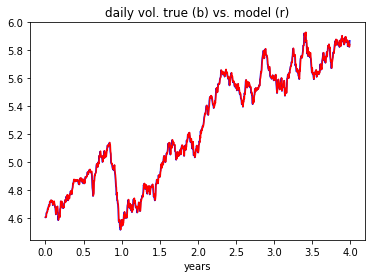

In [49]:
print('ukf filtering prices')
plt.plot(years[:], np.array(y[0,1:])[0], 'b-')
plt.plot(years[:], ukf_obs[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

ukf. filtered vol
# neg vol: [[0]]


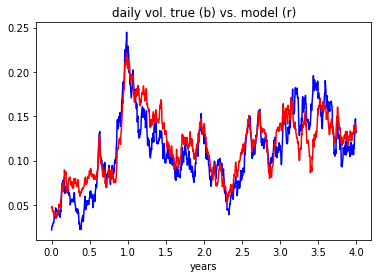

In [50]:
print('ukf. filtered vol')
print("# neg vol:", sum(y[1,:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.plot(years[:], ukf_vol[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

In [8]:
true_params

[0.2, 2.2, 0.15, 0.3, -0.6, 0.02]

In [14]:
# lower/upper bounds for param. estimation
mu = (0.05, 0.5)
kappa = (1, 9)
theta = (0.05, 0.2)
sigma = (0.01, 0.91)
rho = (-0.5, 0)
v0 = true_params[-1]
bounds = [mu, kappa, theta, sigma, rho, v0]

In [16]:
pf_vol, param_steps = pf_heston.filter(bounds, predict_obs=False)

resampling since: 1296.8749623256185
resampling since: 1041.7702434056162
resampling since: 1188.7112061572402
resampling since: 1338.9992939793142
resampling since: 1395.4778229536023
resampling since: 1283.9261860274926
resampling since: 1244.6021736547204
resampling since: 1259.929903858452
resampling since: 1233.4119711397523
resampling since: 1082.7212256880316
resampling since: 1225.8598086095897
resampling since: 1193.8788759904276
resampling since: 1217.284789900656
resampling since: 150.3935134981128
resampling since: 1289.6913342555968
resampling since: 1320.7737090385376
resampling since: 1274.0985554636704
resampling since: 1233.953631531868
resampling since: 1380.5508339365404
resampling since: 1365.483032787358
resampling since: 1227.0447136604494
resampling since: 1348.9034373782674
resampling since: 1179.7532706628526
resampling since: 1269.450249870843
resampling since: 1284.367767383326
resampling since: 1381.8906442128891
resampling since: 781.0736233405631
resamplin

resampling since: 1322.81666695571
resampling since: 1383.4605970958332
resampling since: 1380.3060764130005
resampling since: 1373.0403025428727
resampling since: 1382.2876583842133
resampling since: 1393.7993205052294
resampling since: 1218.3058412066396
resampling since: 1387.0194281926888
resampling since: 1336.2405952618267
resampling since: 1352.074251555736
resampling since: 1175.3832797743994
resampling since: 1190.1375305098206
resampling since: 1364.9120150676072
resampling since: 1378.5502891866645
resampling since: 1345.631110306072
resampling since: 1381.2809078319244
resampling since: 1222.5355290929856
resampling since: 1276.9810702422863
resampling since: 1311.748759331019
resampling since: 1367.817179183759
resampling since: 1273.6535454001946
resampling since: 1244.744954782418
resampling since: 787.8219591053393
resampling since: 1399.2586128514884
resampling since: 1319.346970600957
resampling since: 1312.051480926901
resampling since: 1307.223616525697
resampling s

pf filtering prices


NameError: name 'pf_obs' is not defined

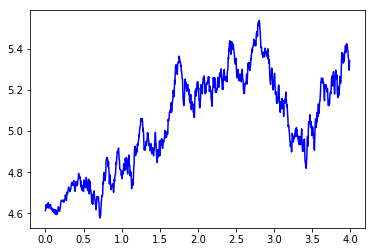

In [17]:
print('pf filtering prices')
plt.plot(years[:], np.array(y[0,1:])[0], 'b-')
plt.plot(years[:], pf_obs[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

pf filtered vol
# neg vol: [[0]]


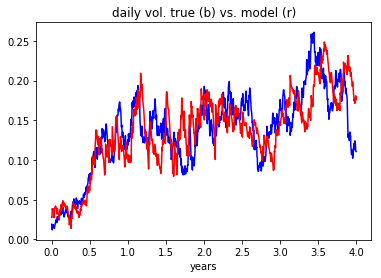

In [18]:
print('pf filtered vol')
print("# neg vol:", sum(y[1,:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.plot(years[:], pf_vol[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

In [19]:
param_steps.transpose()[-1]

array([ 0.23201998,  1.30320493,  0.16644919,  0.28565932, -0.10435016])

##  Convergence of PF params

In [57]:
print("true params: {}".format(true_params))

true params: [0.2, 2.2, 0.15, 0.3, -0.6, 0.02]


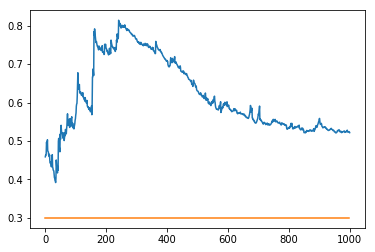

In [62]:
p_idx = 3 # adjust to select param
plt.plot(param_steps[p_idx])
plt.plot(np.ones(N)*true_params[p_idx])